In [1]:
from curs.db import CursDB
from curs.client import CursClient
from curs.types import extract_dates_values
from matplotlib import pyplot as plt
from matplotlib import cm
from dateutil.relativedelta import relativedelta
import numpy as np
from pathlib import Path

In [2]:
db = CursDB(Path.cwd() / "bnr.db", mode="ro")

In [3]:
print(db.get_currencies())

['AED', 'AUD', 'BGN', 'BRL', 'CAD', 'CHF', 'CNY', 'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'HRK', 'HUF', 'INR', 'JPY', 'KRW', 'MDL', 'MXN', 'NOK', 'NZD', 'PLN', 'RSD', 'RUB', 'SEK', 'THB', 'TRY', 'UAH', 'USD', 'XAU', 'XDR', 'ZAR']


In [4]:
%matplotlib inline

def plot_currencies(*, currencies, start_date, end_date = None):
    rows = db.select_value_rows(
            date=(start_date, end_date),
            currency=currencies,
            orderby="date",
        )

    data = {
        c: extract_dates_values(rows, currency=c)
        for c in currencies
    }
    plt.clf()
    for l,dv in data.items():
        plt.plot(dv[0], dv[1], label=l)

    plt.legend()
    plt.gcf().autofmt_xdate(rotation=60)
    plt.gca().set_title("RON")
    plt.grid()
    plt.show()


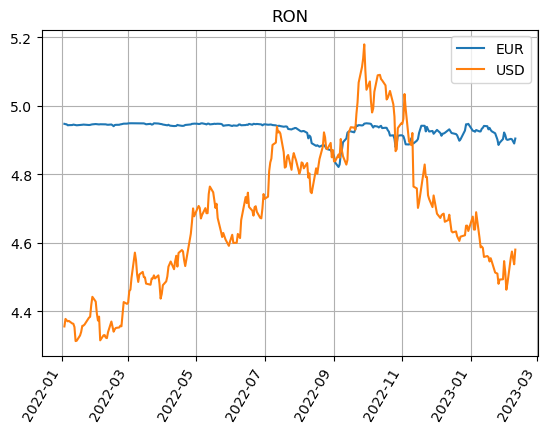

In [5]:
plot_currencies(currencies=["EUR", "USD"], start_date="2022-01-01", end_date=None)


In [6]:
currencies = db.get_currencies()
start_date = None # "1990-01-01"
end_date = None # "2023-02-01"
date = None # (start_date, end_date)

rows = db.select_value_rows(
    date=date,
    currency=currencies,
    orderby="date,currency",
)

data = {
    c: extract_dates_values(rows, currency=c)
    for c in currencies
}

colors = cm.rainbow(np.linspace(0, 1, len(data))) * np.array([0.75, 0.75, 0.75, 1])

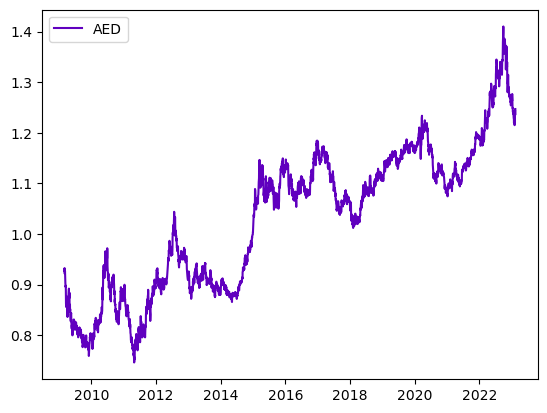

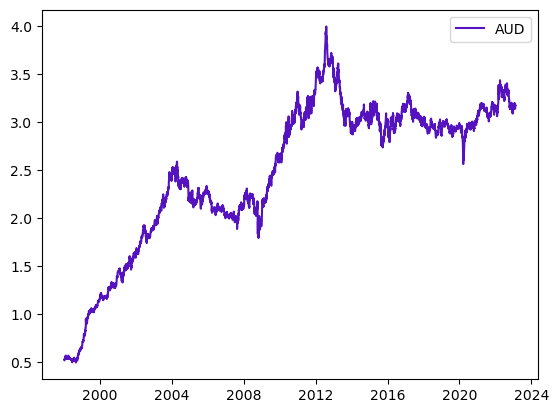

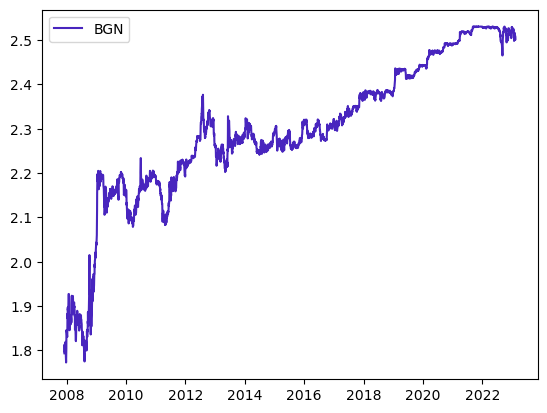

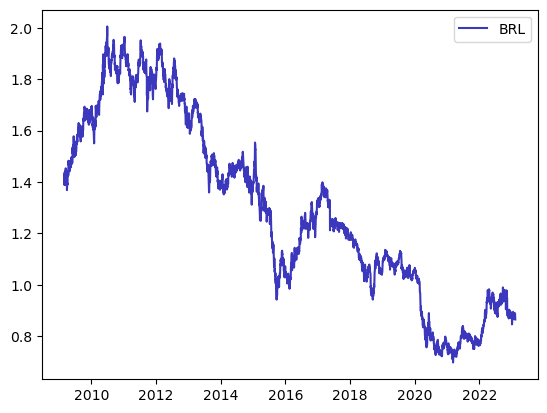

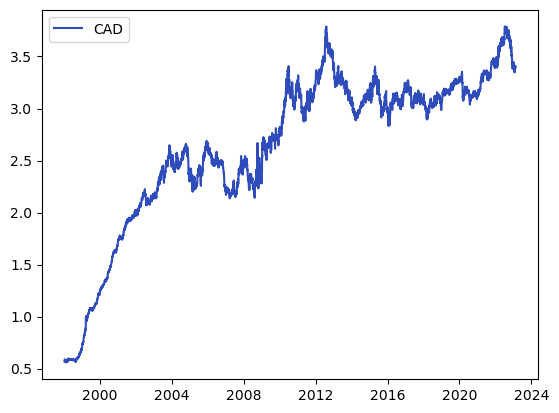

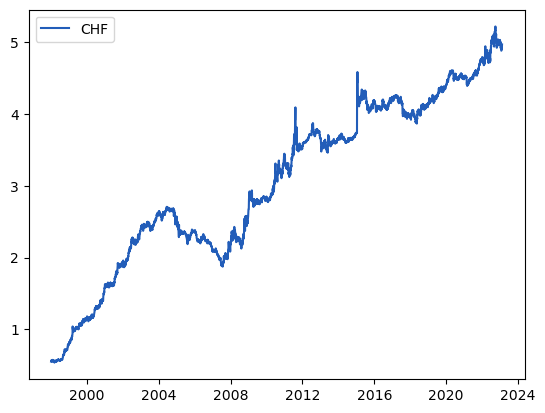

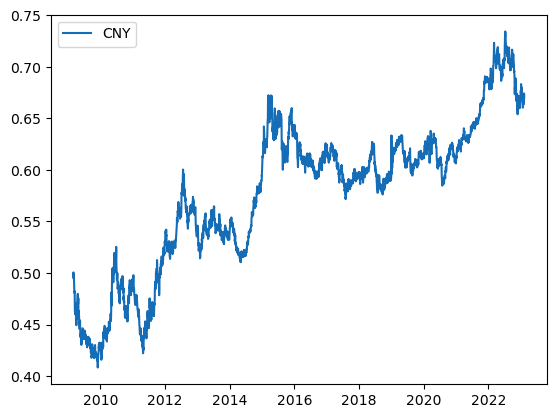

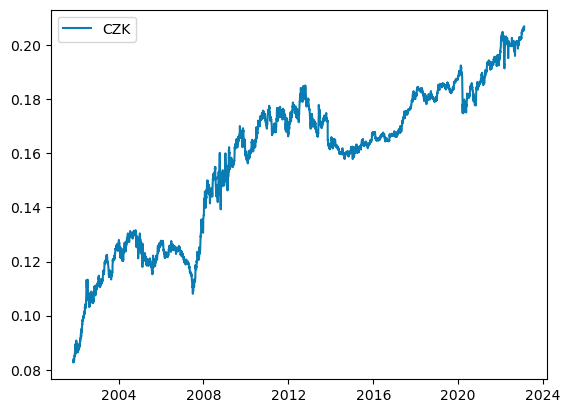

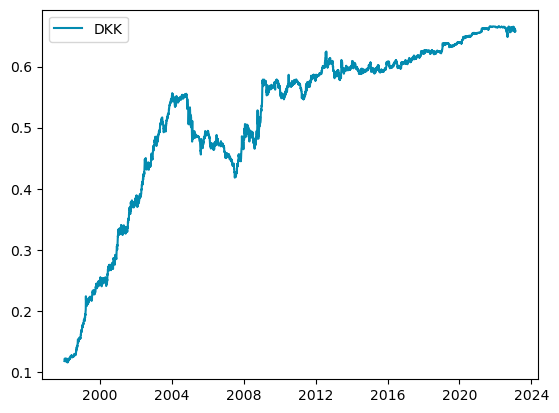

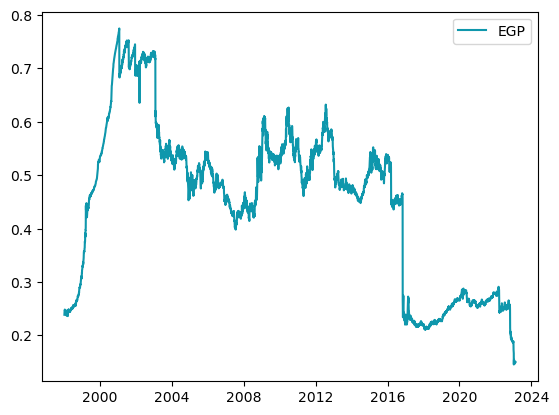

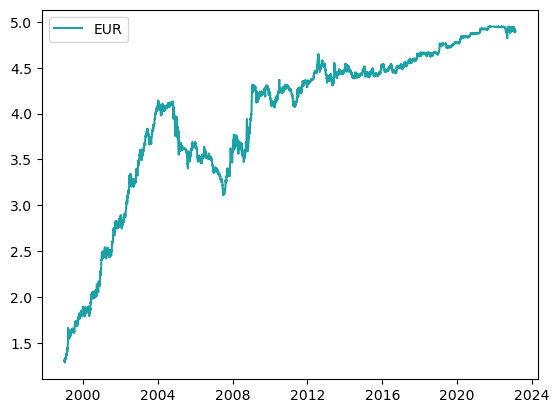

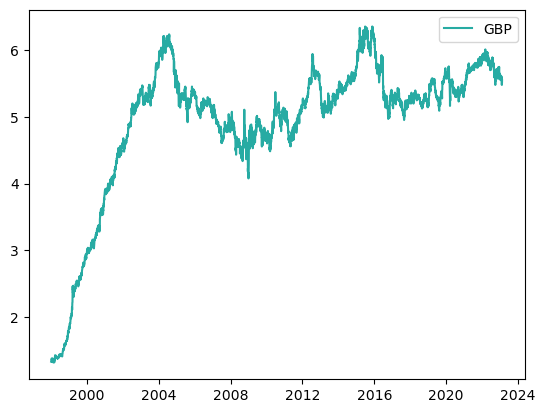

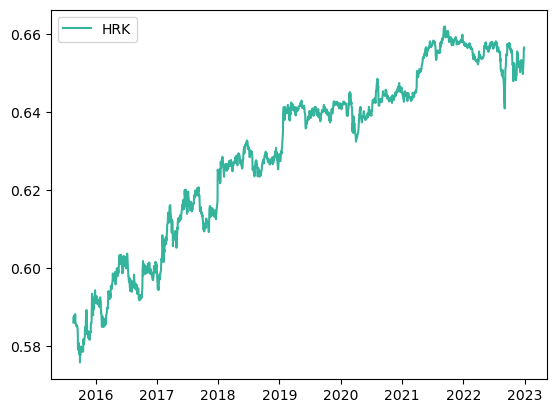

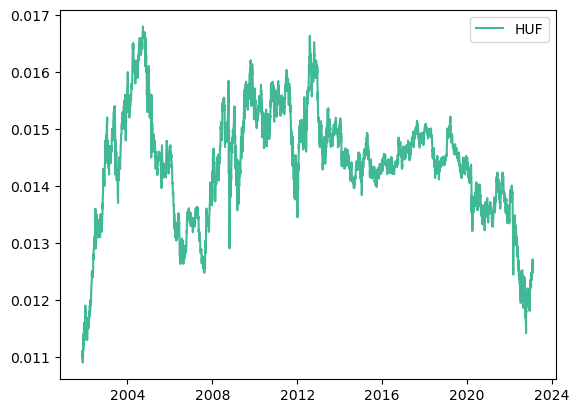

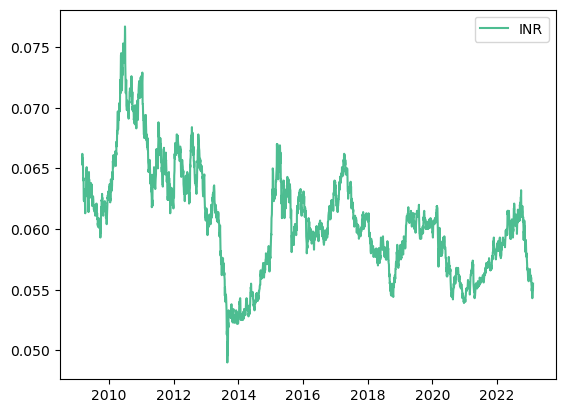

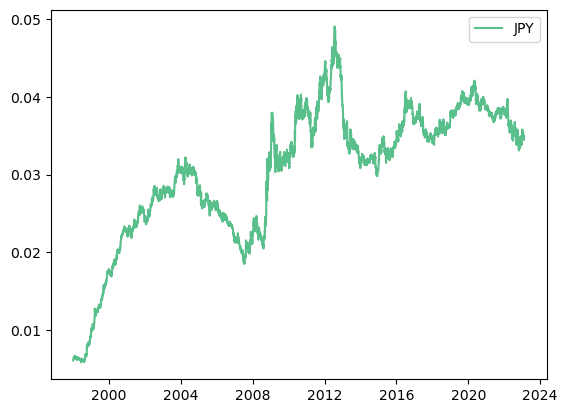

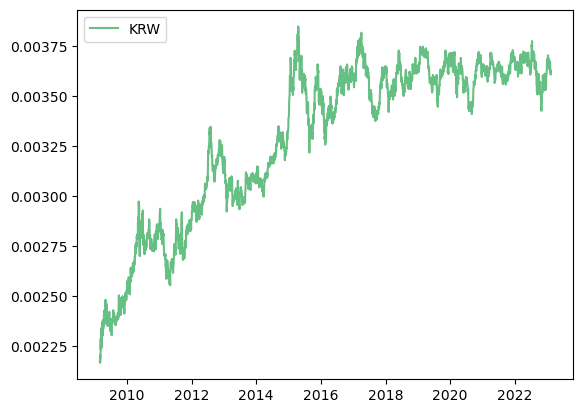

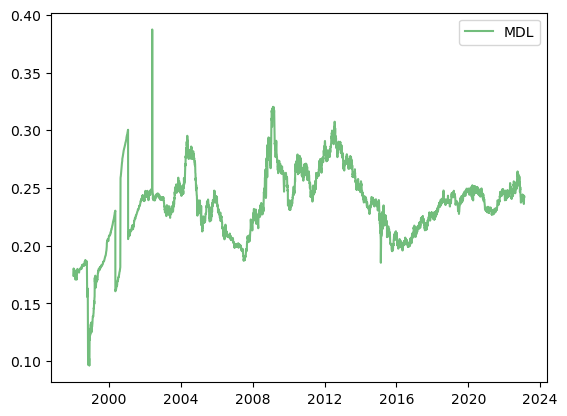

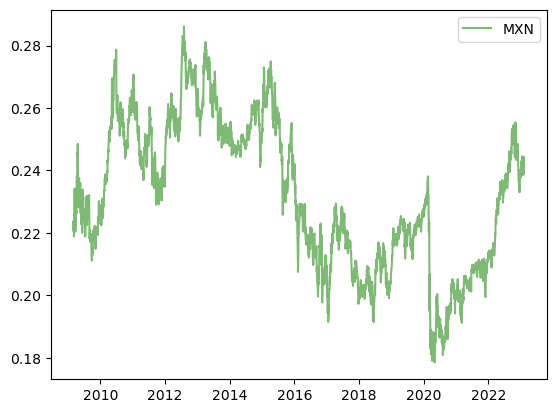

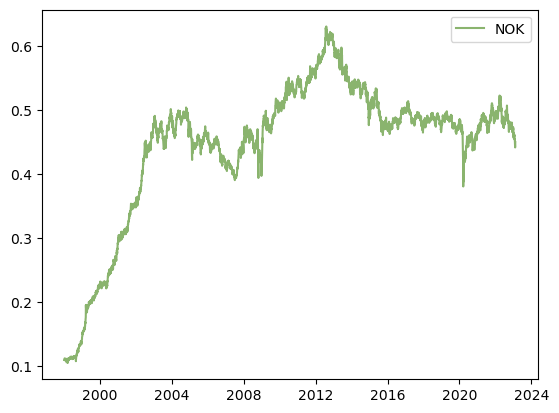

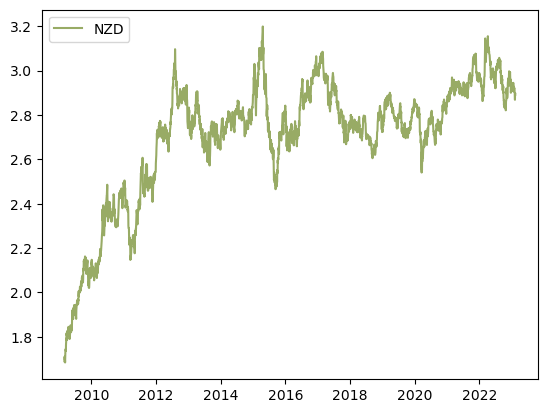

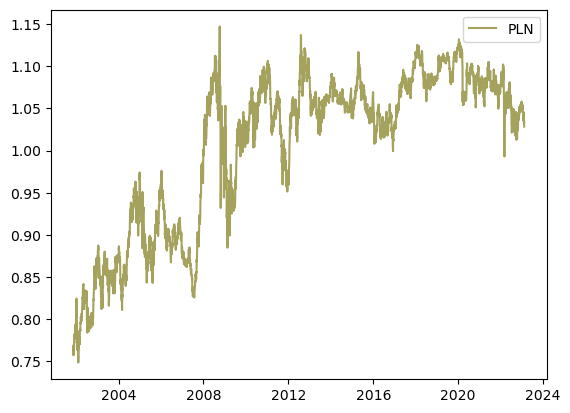

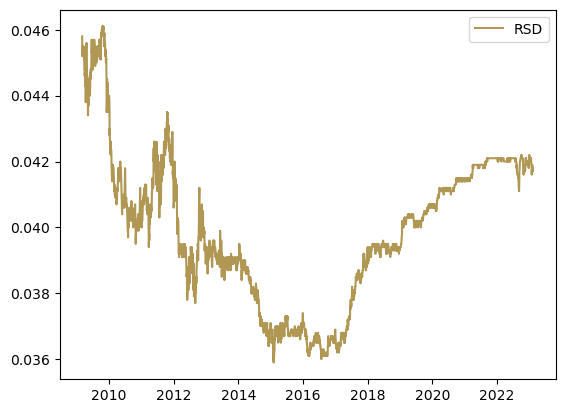

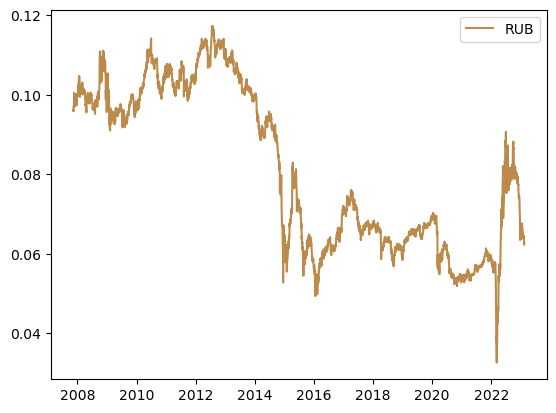

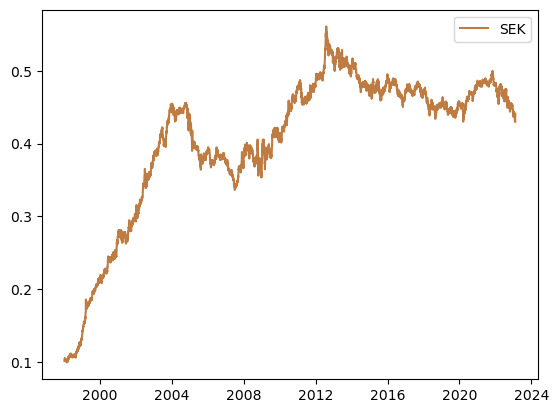

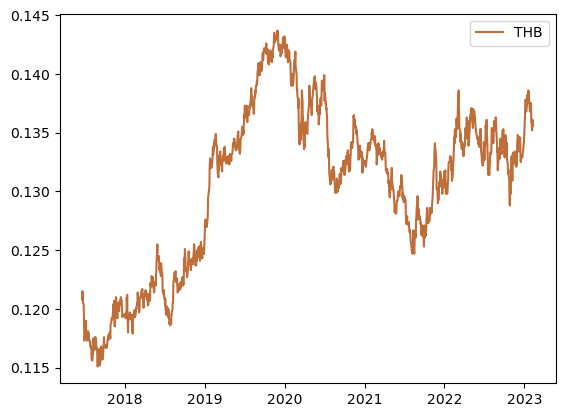

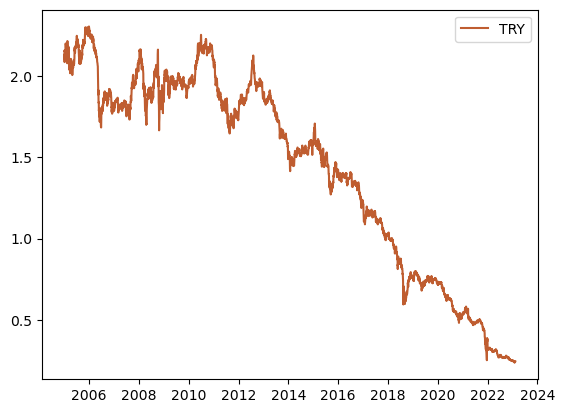

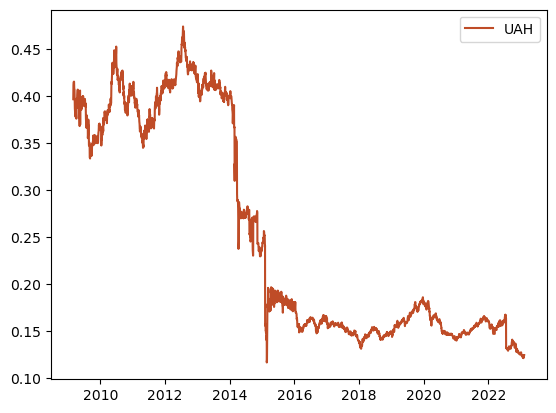

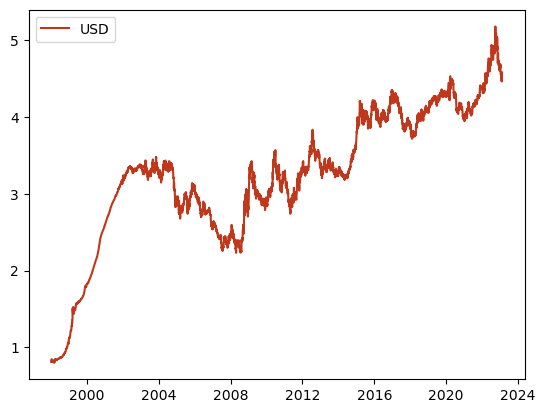

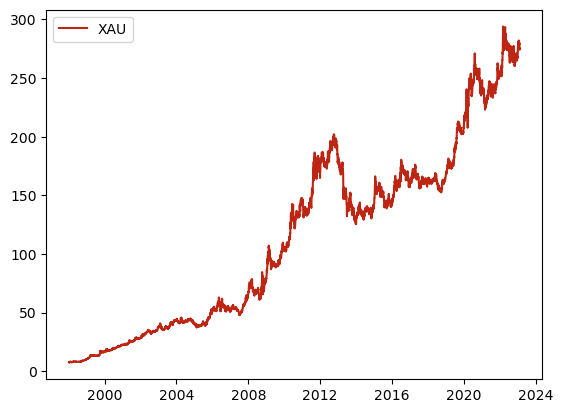

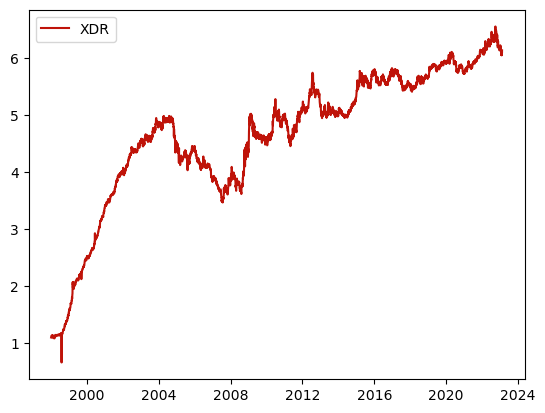

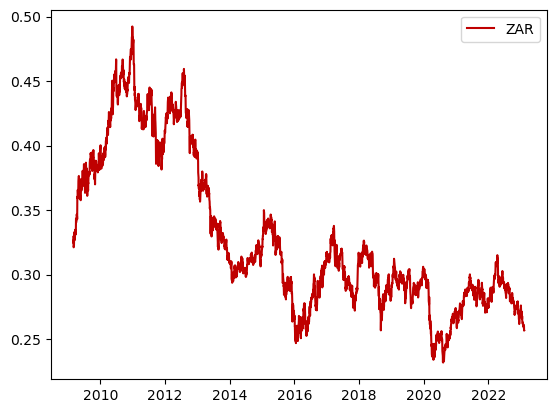

In [7]:
%matplotlib inline
for i,(l,dv) in enumerate(data.items()):
    plt.figure()
    plt.plot(dv[0], dv[1], label=l, color=colors[i])
    plt.legend()
    plt.show()
    plt.close()

